In [1]:
# Eliminar advertencias
import warnings
warnings.filterwarnings('ignore')

# Importar librerias
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# leer archivo y mostrar datos
advertising = pd.read_csv("Slump_test.data.csv")

advertising



No  Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  \
0      1   273.0   82.0    105.0  210.0   9.0         904.0       680.0   
1      2   163.0  149.0    191.0  180.0  12.0         843.0       746.0   
2      3   162.0  148.0    191.0  179.0  16.0         840.0       743.0   
3      4   162.0  148.0    190.0  179.0  19.0         838.0       741.0   
4      5   154.0  112.0    144.0  220.0  10.0         923.0       658.0   
..   ...     ...    ...      ...    ...   ...           ...         ...   
98    99   248.3  101.0    239.1  168.9   7.7         954.2       640.6   
99   100   248.0  101.0    239.9  169.1   7.7         949.9       644.1   
100  101   258.8   88.0    239.6  175.3   7.6         938.9       646.0   
101  102   297.1   40.9    239.9  194.0   7.5         908.9       651.8   
102  103   348.7    0.1    223.1  208.5   9.6         786.2       758.1   

     SLUMP(cm)  FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0         23.0      62.0                               34.99  
1          0.0      20.0                               41.14  
2          1.0      20.0                               41.81  
3          3.0      21.5                               42.08  
4         20.0      64.0                               26.82  
..         ...       ...                                 ...  
98         0.0      20.0                               49.97  
99         2.0      20.0                               50.23  
100        0.0      20.0                               50.50  
101       27.5      67.0                               49.17  
102       29.0      78.0                               48.77  

[103 rows x 11 columns]

In [2]:
advertising = advertising.drop(['No'], axis=1)
advertising = advertising.drop(['SLUMP(cm)'], axis=1)
advertising = advertising.drop(['FLOW(cm)'], axis=1)
advertising


Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  \
0     273.0   82.0    105.0  210.0   9.0         904.0       680.0   
1     163.0  149.0    191.0  180.0  12.0         843.0       746.0   
2     162.0  148.0    191.0  179.0  16.0         840.0       743.0   
3     162.0  148.0    190.0  179.0  19.0         838.0       741.0   
4     154.0  112.0    144.0  220.0  10.0         923.0       658.0   
..      ...    ...      ...    ...   ...           ...         ...   
98    248.3  101.0    239.1  168.9   7.7         954.2       640.6   
99    248.0  101.0    239.9  169.1   7.7         949.9       644.1   
100   258.8   88.0    239.6  175.3   7.6         938.9       646.0   
101   297.1   40.9    239.9  194.0   7.5         908.9       651.8   
102   348.7    0.1    223.1  208.5   9.6         786.2       758.1   

     Compressive Strength (28-day)(Mpa)  
0                                 34.99  
1                                 41.14  
2                                 41.81  
3                                 42.08  
4                                 26.82  
..                                  ...  
98                                49.97  
99                                50.23  
100                               50.50  
101                               49.17  
102                               48.77  

[103 rows x 8 columns]

In [3]:
# información
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(8)
memory usage: 6.6 KB


In [4]:
# descripción estadistica
advertising.describe()



Cement        Slag     Fly ash       Water          SP  \
count  103.000000  103.000000  103.000000  103.000000  103.000000   
mean   229.894175   77.973786  149.014563  197.167961    8.539806   
std     78.877230   60.461363   85.418080   20.208158    2.807530   
min    137.000000    0.000000    0.000000  160.000000    4.400000   
25%    152.000000    0.050000  115.500000  180.000000    6.000000   
50%    248.000000  100.000000  164.000000  196.000000    8.000000   
75%    303.900000  125.000000  235.950000  209.500000   10.000000   
max    374.000000  193.000000  260.000000  240.000000   19.000000   

       Coarse Aggr.  Fine Aggr.  Compressive Strength (28-day)(Mpa)  
count    103.000000  103.000000                          103.000000  
mean     883.978641  739.604854                           36.039417  
std       88.391393   63.342117                            7.838232  
min      708.000000  640.600000                           17.190000  
25%      819.500000  684.500000                           30.900000  
50%      879.000000  742.700000                           35.520000  
75%      952.800000  788.000000                           41.205000  
max     1049.900000  902.000000                           58.530000

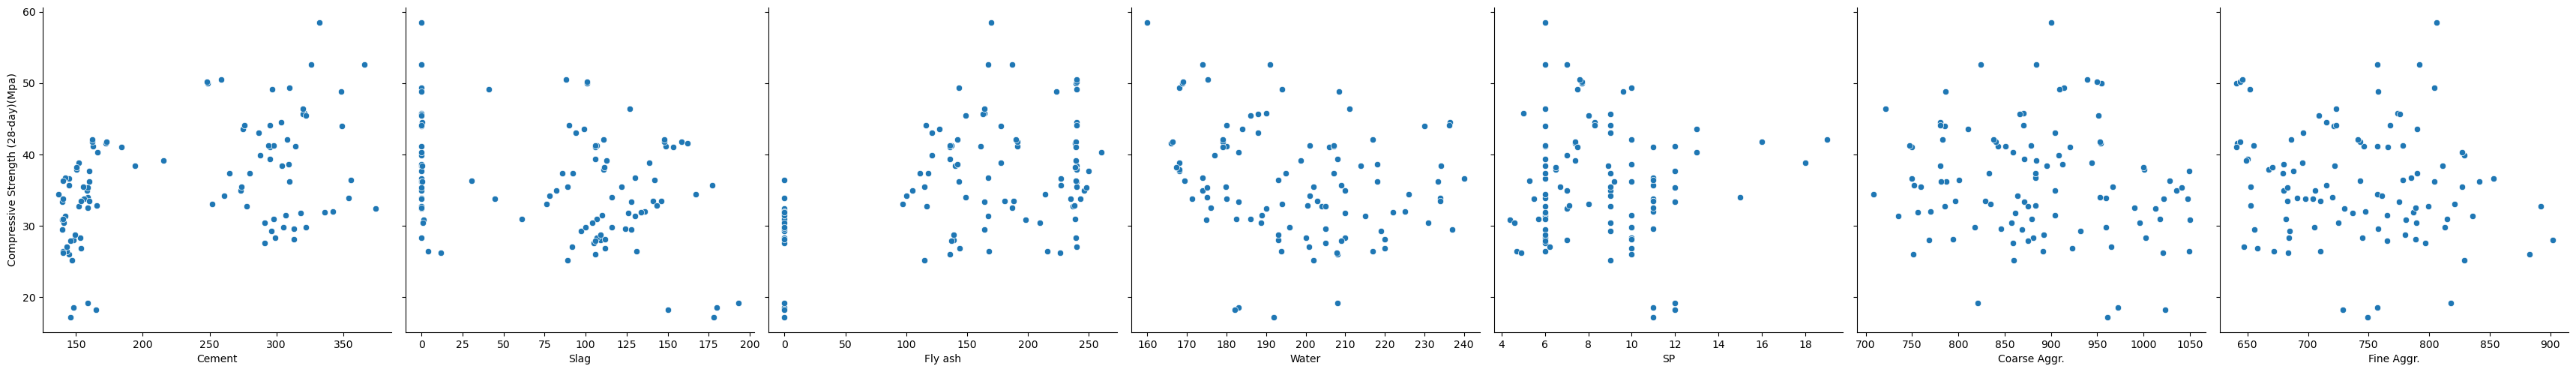

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
# Plot de cada variable con las ventas
sns.pairplot(advertising, x_vars=['Cement', 'Slag','Fly ash', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.' ], 
             y_vars='Compressive Strength (28-day)(Mpa)', size=5, aspect=1, kind='scatter')
plt.show()


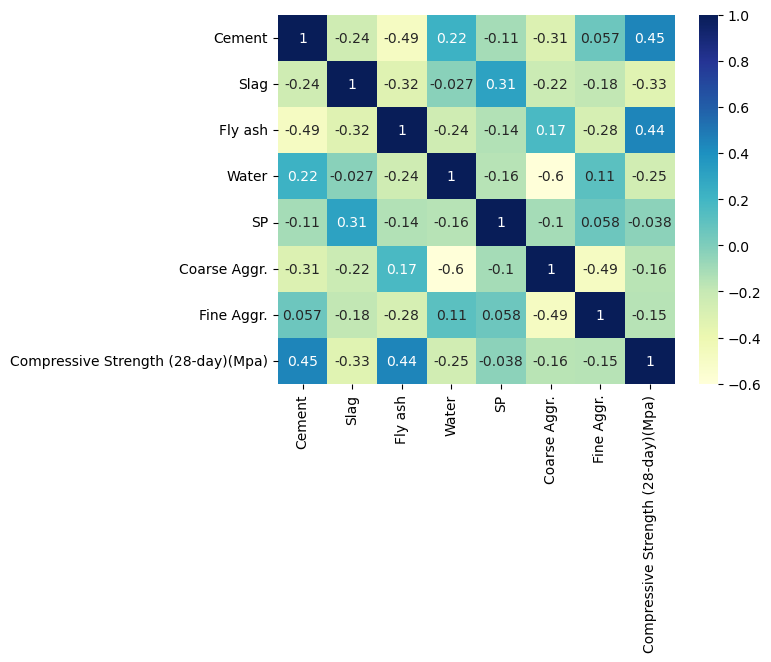

In [6]:
# Usar mapa de calor
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [7]:
# División de los datos en train y test
# ==============================================================================
X = advertising[['Cement', 'Slag','Fly ash', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.']]
y= advertising['Compressive Strength (28-day)(Mpa)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 100,
                                        shuffle      = True
                                    )

In [8]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     72.13
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.77e-30
Time:                        15:36:29   Log-Likelihood:                -196.71
No. Observations:                  82   AIC:                             409.4
Df Residuals:                      74   BIC:                             428.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          136.6198     81.234      1.682   

In [9]:
X_train = X_train.drop(columns = 'SP')
X_test  = X_test.drop(columns = 'SP')


X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     84.48
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.50e-31
Time:                        15:36:33   Log-Likelihood:                -197.05
No. Observations:                  82   AIC:                             408.1
Df Residuals:                      75   BIC:                             424.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          180.8614     58.606      3.086   

In [10]:
X_train = X_train.drop(columns = 'Slag')
X_test  = X_test.drop(columns = 'Slag')


X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     98.25
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.01e-31
Time:                        15:36:38   Log-Likelihood:                -198.63
No. Observations:                  82   AIC:                             409.3
Df Residuals:                      76   BIC:                             423.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           82.0662     11.683      7.025   

In [11]:
X_train = X_train.drop(columns = 'Fine Aggr.')
X_test  = X_test.drop(columns = 'Fine Aggr.')


X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     117.9
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           5.02e-32
Time:                        15:36:41   Log-Likelihood:                -200.54
No. Observations:                  82   AIC:                             411.1
Df Residuals:                      77   BIC:                             423.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           64.5520      7.312      8.828   

In [12]:



# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

2.5%      97.5%
const         49.991584  79.112382
Cement         0.071767   0.091607
Fly ash        0.062245   0.079840
Water         -0.203154  -0.127607
Coarse Aggr.  -0.037413  -0.019463

In [13]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

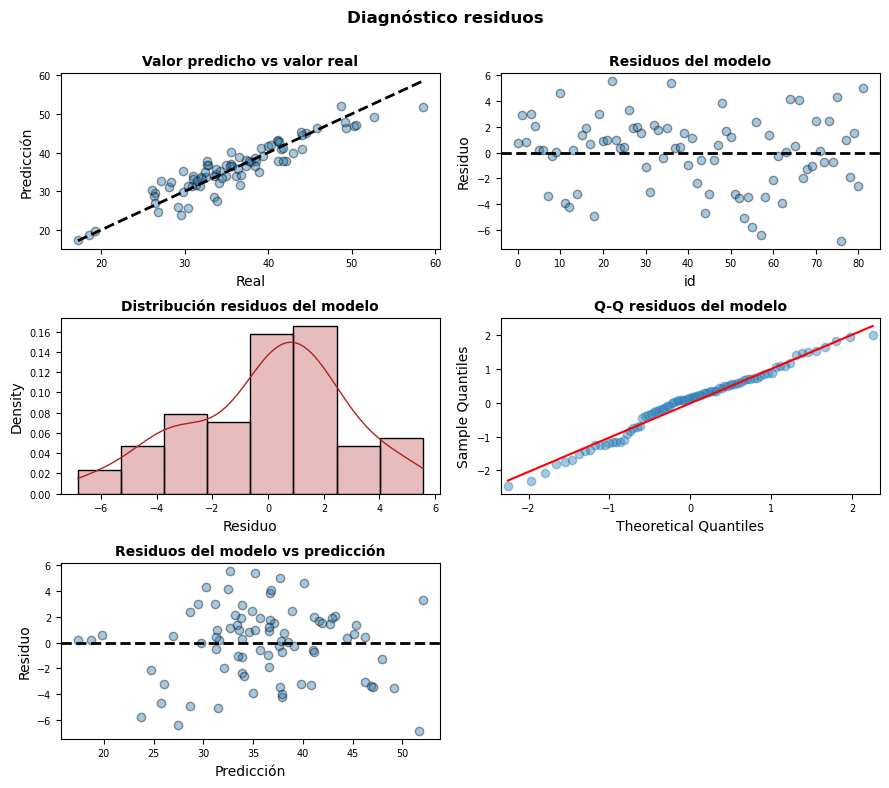

In [14]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");
plt.show()

In [15]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadístico= {k2}, p-value = {p_value}")


Estadístico= 1.954934304655819, p-value = 0.37626290958138364


In [16]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
64  38.146337  0.451652      37.246983      39.045691     32.339406   
85  33.877330  0.617505      32.647720      35.106940     28.010171   
84  34.570607  0.681337      33.213891      35.927323     28.675500   
80  29.421000  0.771602      27.884545      30.957456     23.481951   

    obs_ci_upper  
64     43.953268  
85     39.744489  
84     40.465714  
80     35.360049

In [17]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 2.1387308765896247


In [18]:
#Conclucion: Compressive Strength (28-day)(Mpa) = 64.5520 +  0.0817*cement + 0.0710*Fly ash + -0.1453* water + -0.0248*Coarse Aggr.
#es capaz de explicar el 86.6% de la variabilidad observada en la esperanza de vida (R2: 0.865, R2-Adjusted: 0.852). 
#El test F muestra que es significativo (p-value: 5.02e-32). Se satisfacen todas las condiciones para este tipo de regresión múltiple.

In [19]:
# implementacion de lasso
# ==============================================================================

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

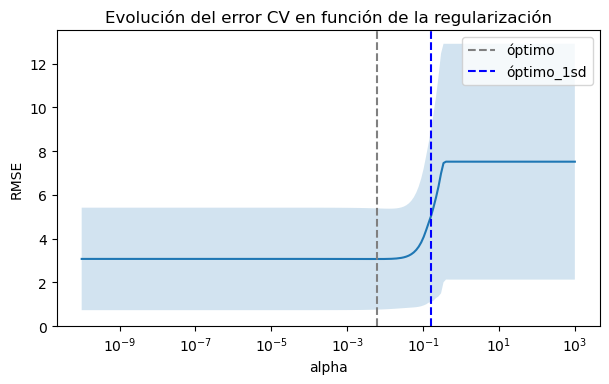

In [20]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();
plt.show()

In [22]:
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.00594113398496504


In [23]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [0.16257557]


In [24]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

predictor      coef
1        Cement  0.080371
2       Fly ash  0.069833
3         Water -0.159579
4  Coarse Aggr. -0.027138

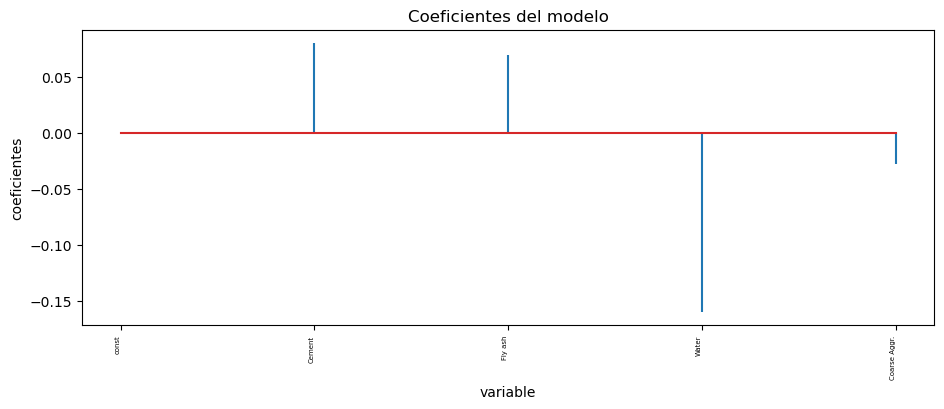

In [25]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');
plt.show()

In [26]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:9]

array([41.48797825, 32.21644362, 37.66655217, 40.71205402, 36.14144791,
       29.34352607, 32.59707021, 46.3318363 , 46.53789103])

In [27]:
# Error de test del modelo 
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 2.1592015420062154


In [28]:
#para concluir los dos modelos tienen practicamente el error de test siendo el de regresion lienal de 2.13 y el de laso de 2.15 
#se spuede decir que los dos se pueden utilizar.